In [2]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '/mnt/d/GitHub/pypsa_utilities/eskom data/')

import data_utilities as du
import plotting_utilities as pu
import financial_utilities as fu

In [9]:
eskom_data=du.eskom_data('../data/ESK2546.csv')

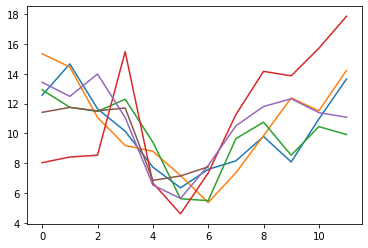

In [14]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 


for y in [2017,2018,2019,2020,2021,2022]:
    data=df.loc['Generation Total','PCLF %']
    plt.plot(data[data.index.year==y].values)



In [207]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
stations=df[df.type=='coal'].index.get_level_values(0)

In [208]:
stations

Index(['Arnot', 'Arnot', 'Arnot', 'Arnot', 'Arnot', 'Arnot', 'Arnot', 'Arnot',
       'Arnot', 'Arnot',
       ...
       'Tutuka', 'Tutuka', 'Tutuka', 'Tutuka', 'Tutuka', 'Tutuka', 'Tutuka',
       'Tutuka', 'Tutuka', 'Tutuka'],
      dtype='object', name='STATION', length=918)

In [200]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
stations=df[df.type=='coal'].index.get_level_values(0).unique()
eaf=pd.DataFrame(0,index=stations,columns=range(2017,2023))
planned=pd.DataFrame(0,index=stations,columns=range(2017,2023))
unplanned=pd.DataFrame(0,index=stations,columns=range(2017,2023))
for s in stations:
    eaf.loc[s,:]=df.loc[s,'EAF %'].groupby(df.loc[s,'EAF %'].index.year).mean()
    planned.loc[s,:]=df.loc[s,'PCLF %'].groupby(df.loc[s,'PCLF %'].index.year).mean()
    unplanned.loc[s,:]=df.loc[s,'UCLF %'].groupby(df.loc[s,'UCLF %'].index.year).mean()+df.loc[s,'OCLF %'].groupby(df.loc[s,'OCLF %'].index.year).mean()

In [147]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
df=df[df.type=='coal']
df.index=df.index.get_level_values(1)
variable='EAF %'
type_avg=df.groupby(level=0).mean()
type_avg.drop(['MW','capacity'],axis=1)
type_avg.loc[:,variable].groupby(type_avg.index.year).mean()

Date
2017    75.545641
2018    65.966300
2019    59.601012
2020    59.449246
2021    55.775455
2022    54.406007
Name: EAF %, dtype: float64

In [217]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
stations=df[df.type=='coal'].index.get_level_values(0)

installed_capacity=pd.DataFrame(0,index=stations,columns=range(2017,2023))
for s in stations:
    for y in range(2017,2023):
        installed_capacity.loc[s,y]=df.loc[(s,str(y)),'MW'].mean()

In [219]:
installed_capacity.to_clipboard()

AttributeError: 'NoneType' object has no attribute 'values'

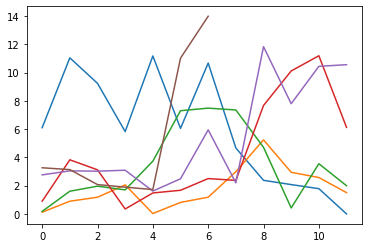

In [107]:
mean_pclf=type_avg[variable].groupby(type_avg.index.month).mean().to_clipboard()
for y in [2017,2018,2019,2020,2021,2022]:
    plt.plot(type_avg.loc[str(y),variable].values)

plt.plot(mean_pclf.values,'k--',linewidth=3)
plt.legend([2017,2018,2019,2020,2021,2022])

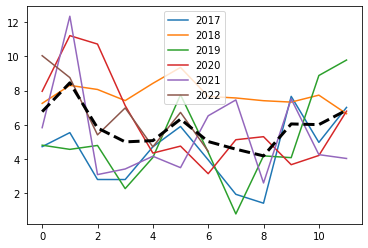

In [102]:
mean_pclf=coal_plants['UCLF %'].groupby(coal_plants.index.month).mean()
for y in [2017,2018,2019,2020,2021,2022]:
    plt.plot(coal_plants.loc[str(y),'UCLF %'].values)

plt.plot(mean_pclf.values,'k--',linewidth=3)
plt.legend([2017,2018,2019,2020,2021,2022])

Text(0, 0.5, 'Coal fleet EAF')

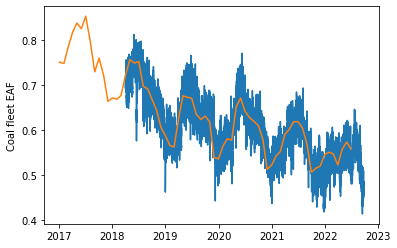

In [63]:
plt.plot(eskom_data['coal_eaf'])
plt.plot(df[df.type=='coal'].groupby('Date').sum()['capacity'].divide(df[df.type=='coal'].groupby('Date').sum()['MW']))
plt.ylabel('Coal fleet EAF')

AttributeError: 'list' object has no attribute 'plot'

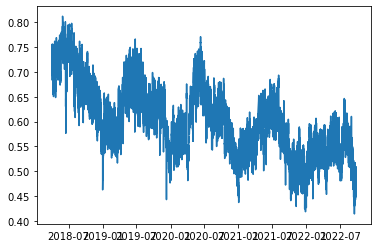

In [11]:
plt.plot(eskom_data['coal_eaf']).plot()

In [3]:
n = pypsa.Network("../results/version-0.6/networks/solved_ambitions_9-supply_redz_lcopt_LC.nc")


INFO:pypsa.io:Imported network solved_ambitions_9-supply_redz_lcopt_LC.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


In [15]:
wind_costs = n.generators.capital_cost[(n.generators.carrier=='onwind') & n.get_active_assets('Generator',2025)] + 
wind_capacity = n.generators.p_nom_opt[(n.generators.carrier=='onwind') & n.get_active_assets('Generator',2025)]
wind_energy = n.generators_t.p[wind_costs.index].loc[2025].sum().sum()

wind_capacity.mul(wind_costs).sum()/wind_energy

588.8038038607522

In [14]:
wind_energy

Generator
EASTERN CAPE onwind_2025     1.338994e+07
FREE STATE onwind_2025       1.208248e+00
NORTH WEST onwind_2025       7.196390e+07
NORTHERN CAPE onwind_2025    1.241205e+07
WESTERN CAPE onwind_2025     2.907833e-01
dtype: float64

<AxesSubplot:xlabel='timestep'>

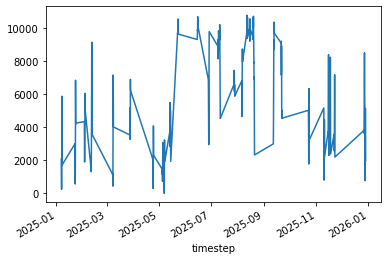

In [107]:
n.generators_t.p['EAST LONDON onwind_2025'].loc[2025].plot()

<AxesSubplot:xlabel='Generator'>

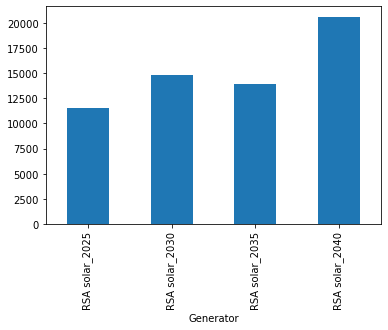

In [96]:
n.generators.p_nom_opt[n.generators.carrier=='solar'].plot.bar()

In [79]:
n=pypsa.Network("../networks/solved_original_27-supply_redz_lcopt_LC.nc")

FileNotFoundError: [Errno 2] No such file or directory: b'/mnt/d/GitHub/pypsa-za/networks/solved_original_27-supply_redz_lcopt_LC.nc'

<AxesSubplot:xlabel='Generator'>

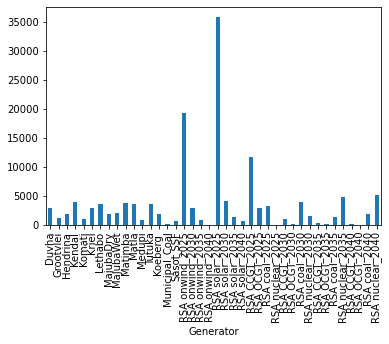

In [74]:
n.generators.p_nom_opt.drop('RSA load_shedding').plot.bar()

In [76]:
n.snapshots.levels[0]

Int64Index([2025, 2030, 2035, 2040], dtype='int64', name='period')

In [13]:
n.generators.loc['RSA solar_2025',:]

carrier                          solar
p_nom                              0.0
build_year                        2025
y                                  NaN
x                                  NaN
efficiency                         1.0
marginal_cost                 0.020499
capital_cost            2728290.697247
ramp_limit_up                      NaN
lifetime                          25.0
bus                                RSA
p_nom_extendable                  True
p_nom_max                867829.274064
control                             PQ
p_nom_opt                     0.000703
type                                  
p_nom_min                          0.0
p_min_pu                           0.0
p_max_pu                           1.0
p_set                              0.0
q_set                              0.0
sign                               1.0
committable                      False
start_up_cost                      0.0
shut_down_cost                     0.0
min_up_time              

In [11]:
n.generators.loc['RSA CCGT_2025',:]

carrier                           CCGT
p_nom                              0.0
build_year                        2025
y                                  NaN
x                                  NaN
efficiency                        0.49
marginal_cost              1124.050157
capital_cost            3835104.858603
ramp_limit_up                      NaN
lifetime                          30.0
bus                                RSA
p_nom_extendable                  True
p_nom_max                          inf
control                             PQ
p_nom_opt                 21055.502587
type                                  
p_nom_min                          0.0
p_min_pu                           0.0
p_max_pu                           1.0
p_set                              0.0
q_set                              0.0
sign                               1.0
committable                      False
start_up_cost                      0.0
shut_down_cost                     0.0
min_up_time              

In [13]:
n.get_active_assets('Generator',2030)

Generator
Duvha                 True
Grootvlei            False
Hendrina             False
Kendal                True
Komati               False
Kriel                False
Lethabo               True
MajubaDry             True
MajubaWet             True
Matimba               True
Matla                 True
Medupi                True
Tutuka                True
Koeberg               True
Municipal_Coal        True
Sasol_SSF             True
RSA onwind_2025       True
RSA onwind_2030       True
RSA solar_2025        True
RSA solar_2030        True
RSA CCGT_2025         True
RSA OCGT_2025         True
RSA coal_2025         True
RSA nuclear_2025      True
RSA CCGT_2030         True
RSA OCGT_2030         True
RSA coal_2030         True
RSA nuclear_2030      True
RSA load_shedding     True
dtype: bool

In [11]:
n.generators

,carrier,p_nom,build_year,y,x,efficiency,marginal_cost,capital_cost,ramp_limit_up,lifetime,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
Duvha,coal,2900.0,2025,-25.95954,29.34094,0.326264,187.210393,5.940000e+05,0.068276,9.0,...,False,0.0,0.0,0,0,1,0,NaN,1.0,1.0
Grootvlei,coal,1080.0,2025,-26.76955,28.49951,0.285488,335.690980,5.940000e+05,0.050000,3.0,...,False,0.0,0.0,0,0,1,0,NaN,1.0,1.0
Hendrina,coal,1900.0,2025,-26.03138,29.60138,0.296760,263.236840,5.940000e+05,0.034737,1.0,...,False,0.0,0.0,0,0,1,0,NaN,1.0,1.0
Kendal,coal,3840.0,2025,-26.08805,28.96888,0.306305,275.616770,5.940000e+05,0.028125,18.0,...,False,0.0,0.0,0,0,1,0,NaN,1.0,1.0
Komati,coal,900.0,2025,-26.09078,29.47446,0.260323,300.401081,5.940000e+05,0.033333,3.0,...,False,0.0,0.0,0,0,1,0,NaN,1.0,1.0
Kriel,coal,2880.0,2025,-26.25404,29.18008,0.320199,266.129574,5.940000e+05,0.075000,4.0,...,False,0.0,0.0,0,0,1,0,NaN,1.0,1.0
Lethabo,coal,3540.0,2025,-26.74027,27.97500,0.328018,179.930346,5.940000e+05,0.100000,15.0,...,False,0.0,0.0,0,0,1,0,NaN,1.0,1.0
MajubaDry,coal,1830.0,2025,-27.09555,29.77055,0.306305,313.224713,5.940000e+05,0.055738,23.0,...,False,0.0,0.0,0,0,1,0,NaN,1.0,1.0
MajubaWet,coal,2010.0,2025,-27.09555,29.77055,0.327154,313.403729,5.940000e+05,0.056716,26.0,...,False,0.0,0.0,0,0,1,0,NaN,1.0,1.0
